In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
students = pd.read_csv("students.csv")
students.head()
# internships = pd.read_csv("internships.csv")

,student_id,name,age,gender,category,district_code,education,skills,experience_months,past_internships
0,1,Pooja Pau,25,F,GEN,BR15,MBA,"java,css,c",5,2
1,2,Kamala Purohit,25,F,OBC,MH01,BTech IT,"sales,communication,sql,powerbi,ml",21,1
2,3,Bahadurjit Din,24,F,ST,BR15,BA,"css,excel",2,0
3,4,Nitara Jani,23,M,ST,DL01,BTech IT,"java,powerbi,excel",14,2
4,5,Indira Bansal,25,M,ST,BR01,BA,"java,tableau,c++,react,python",1,2


In [13]:
internship = pd.read_csv("internships.csv")
internship.head()

,internship_id,title,company,sector,required_skills,location_city,location_district_code,remote,seats,stipend,start_date,end_date
0,1,Intern IT,Hayer LLC,Finance,"ml,nodejs",Kochi,BR12,True,4,7000,2025-11-04,2026-01-05
1,2,Assistant IT,"Sodhi, Maharaj and Natt",Marketing,"nodejs,excel",Hyderabad,BR01,True,6,8000,2026-02-20,2026-05-26
2,3,Trainee IT,"Raj, Vasa and Bhatt",Marketing,"sql,tableau",Kochi,BR01,False,7,8000,2025-11-18,2026-01-19
3,4,Assistant Finance,"Salvi, Nadkarni and Anand",Marketing,"css,python,java,marketing",Navi Mumbai,BR15,True,6,8000,2026-02-15,2026-06-07
4,5,Intern Consulting,Nagy Inc,Marketing,"react,html,powerbi,python",Hubli–Dharwad,MH01,False,6,8000,2025-11-14,2026-02-10


In [14]:
applications = pd.read_csv("applications.csv")  
applications.shape

(37500, 9)

Successfully created applications.csv!


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   studentID            37500 non-null  int64 
 1   studentName          37500 non-null  object
 2   experience_months    37500 non-null  int64 
 3   studentSkills        37500 non-null  object
 4   studentLocationPref  37500 non-null  object
 5   InternshipID         37500 non-null  int64 
 6   InternshipTitle      37500 non-null  object
 7   InternshipSkills     37500 non-null  object
 8   InternshipLocation   37500 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


--- Summary Statistics for Numerical Data ---
          studentID  experience_months  InternshipID
count  37500.000000       37500.000000  37500.000000
mean     125.500000          12.204000     75.500000
std       72.169169           

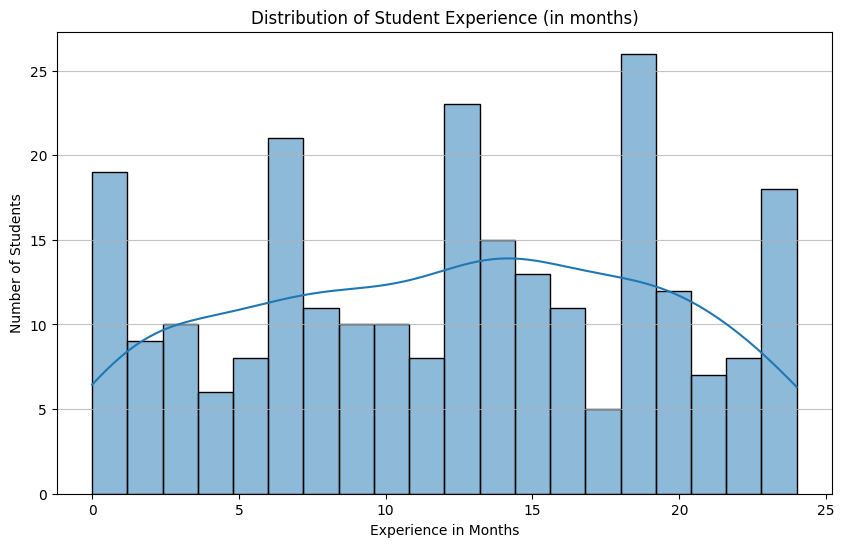

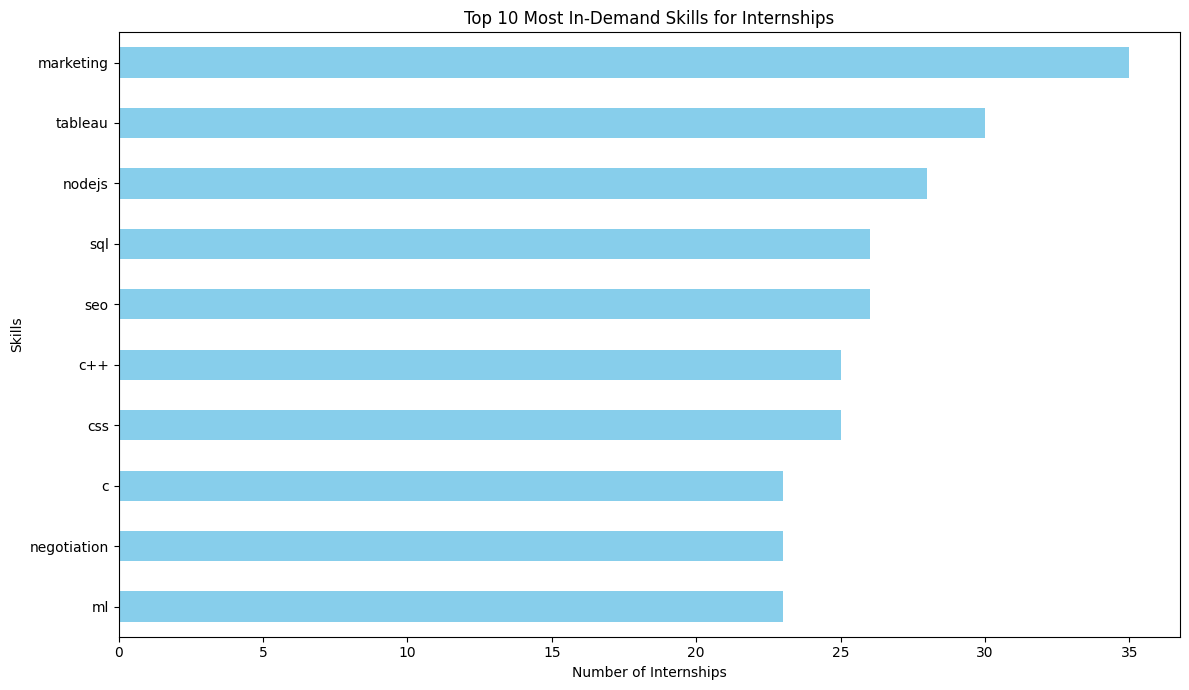

In [20]:
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Part 1: Load and merge the datasets ---
    students = pd.read_csv("students.csv")
    internships = pd.read_csv("internships.csv")

    applications_list = list(product(students.to_dict('records'), internships.to_dict('records')))
    applications = pd.DataFrame(applications_list)

    def flatten(row):
        student_data = row[0]
        internship_data = row[1]
        return {
            "studentID": student_data.get("student_id"),
            "studentName": student_data.get("name"),
            "experience_months": student_data.get("experience_months"),
            "studentSkills": student_data.get("skills"),
            "studentLocationPref": student_data.get("district_code"),
            "InternshipID": internship_data.get("internship_id"),
            "InternshipTitle": internship_data.get("title"),
            "InternshipSkills": internship_data.get("required_skills"),
            "InternshipLocation": internship_data.get("location_city"),
        }

    applications_flat = applications.apply(flatten, axis=1, result_type="expand")
    applications_flat.to_csv("applications.csv", index=False)
    print("Successfully created applications.csv!")

    # --- Part 2: Perform the initial data analysis ---
    print("\n\n--- Dataset Overview ---")
    applications_flat.info()

    print("\n\n--- Summary Statistics for Numerical Data ---")
    print(applications_flat.describe())

    # --- Part 3: Create Visualizations ---
    print("\n\nGenerating visualizations...")
    
    # Plot 1: Distribution of Student Experience
    plt.figure(figsize=(10, 6))
    sns.histplot(students['experience_months'], bins=20, kde=True)
    plt.title('Distribution of Student Experience (in months)')
    plt.xlabel('Experience in Months')
    plt.ylabel('Number of Students')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('student_experience_distribution.png')
    print("Saved 'student_experience_distribution.png'")

    # Plot 2: Top 10 Most Required Skills for Internships
    skills_series = internships['required_skills'].str.split(',').explode().str.strip()
    top_skills = skills_series.value_counts().head(10)
    
    plt.figure(figsize=(12, 7))
    top_skills.sort_values(ascending=True).plot(kind='barh', color='skyblue')
    plt.title('Top 10 Most In-Demand Skills for Internships')
    plt.xlabel('Number of Internships')
    plt.ylabel('Skills')
    plt.tight_layout()
    plt.savefig('top_internship_skills.png')
    print("Saved 'top_internship_skills.png'")

except FileNotFoundError:
    print("Could not find 'students.csv' or 'internships.csv'. Please ensure they are in the same directory as your script.")
except Exception as e:
    print(f"An error occurred: {e}")

In [16]:


# Load the applications dataset
applications = pd.read_csv("applications.csv")

# --- Helper Functions ---
def skill_match(student_skills, internship_skills):

    """Calculate overlap ratio between student skills and internship required skills."""
    if pd.isna(student_skills) or pd.isna(internship_skills):
        return 0
    student_set = set([s.strip().lower() for s in student_skills.split(",")])
    internship_set = set([s.strip().lower() for s in internship_skills.split(",")])
    if not internship_set:  # avoid divide by zero
        return 0
    return len(student_set & internship_set) / len(internship_set)

def location_match(student_loc, internship_loc):
    """Check if student preferred location matches internship location."""
    return int(str(student_loc).strip().lower() == str(internship_loc).strip().lower())

def experience_gap(student_exp, min_required=6):
    """Gap between student experience and assumed minimum (default=6 months)."""
    return student_exp - min_required


# --- Feature Engineering ---
applications["SkillMatchScore"] = applications.apply(
    lambda row: skill_match(row["studentSkills"], row["InternshipSkills"]), axis=1
)

applications["LocationMatch"] = applications.apply(
    lambda row: location_match(row["studentLocationPref"], row["InternshipLocation"]), axis=1
)

applications["ExperienceGap"] = applications.apply(
    lambda row: experience_gap(row["experience_months"]), axis=1
)

# --- Save the enriched dataset ---
applications.to_csv("applications_features.csv", index=False)
print("✅ Created applications_features.csv with engineered features!")
print(applications.head(30))


✅ Created applications_features.csv with engineered features!
    studentID studentName  experience_months studentSkills  \
0           1   Pooja Pau                  5    java,css,c   
1           1   Pooja Pau                  5    java,css,c   
2           1   Pooja Pau                  5    java,css,c   
3           1   Pooja Pau                  5    java,css,c   
4           1   Pooja Pau                  5    java,css,c   
5           1   Pooja Pau                  5    java,css,c   
6           1   Pooja Pau                  5    java,css,c   
7           1   Pooja Pau                  5    java,css,c   
8           1   Pooja Pau                  5    java,css,c   
9           1   Pooja Pau                  5    java,css,c   
10          1   Pooja Pau                  5    java,css,c   
11          1   Pooja Pau                  5    java,css,c   
12          1   Pooja Pau                  5    java,css,c   
13          1   Pooja Pau                  5    java,css,c   
14      

In [21]:
applications.head(30)

,0,1
0,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 1, 'title': 'Intern IT', 'co..."
1,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 2, 'title': 'Assistant IT', ..."
2,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 3, 'title': 'Trainee IT', 'c..."
3,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 4, 'title': 'Assistant Finan..."
4,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 5, 'title': 'Intern Consulti..."
5,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 6, 'title': 'Assistant HR', ..."
6,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 7, 'title': 'Intern Data Sci..."
7,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 8, 'title': 'Trainee Data Sc..."
8,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 9, 'title': 'Trainee Marketi..."
9,"{'student_id': 1, 'name': 'Pooja Pau', 'age': ...","{'internship_id': 10, 'title': 'Trainee Financ..."


In [18]:
(applications[["studentSkills","InternshipSkills","InternshipTitle","SkillMatchScore","LocationMatch"]].tail())


,studentSkills,InternshipSkills,InternshipTitle,SkillMatchScore,LocationMatch
37495,"excel,negotiation,c++,tableau,seo","excel,communication,nodejs,html",Trainee IT,0.250000,0
37496,"excel,negotiation,c++,tableau,seo","react,python",Assistant Marketing,0.000000,0
37497,"excel,negotiation,c++,tableau,seo","java,javascript,negotiation",Trainee Data Science,0.333333,0
37498,"excel,negotiation,c++,tableau,seo","html,seo,css",Intern Finance,0.333333,0
37499,"excel,negotiation,c++,tableau,seo","ml,python",Assistant Consulting,0.000000,0


In [19]:
apps_per_student = applications.groupby("studentID")["SkillMatchScore"].describe()
apps_per_student.head(100)


,count,mean,std,min,25%,50%,75%,max
studentID,,,,,,,,
1,150.0,0.155000,0.210205,0.0,0.0,0.00,0.312500,1.000000
2,150.0,0.223333,0.236161,0.0,0.0,0.25,0.500000,1.000000
3,150.0,0.087778,0.154713,0.0,0.0,0.00,0.250000,0.500000
4,150.0,0.133333,0.184201,0.0,0.0,0.00,0.250000,0.666667
5,150.0,0.253333,0.229060,0.0,0.0,0.25,0.500000,1.000000
...,...,...,...,...,...,...,...,...
96,150.0,0.143889,0.204557,0.0,0.0,0.00,0.250000,1.000000
97,150.0,0.254444,0.252834,0.0,0.0,0.25,0.500000,1.000000
98,150.0,0.230556,0.260574,0.0,0.0,0.25,0.333333,1.000000
